In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('glass.csv')
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [3]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [4]:
df.isna().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

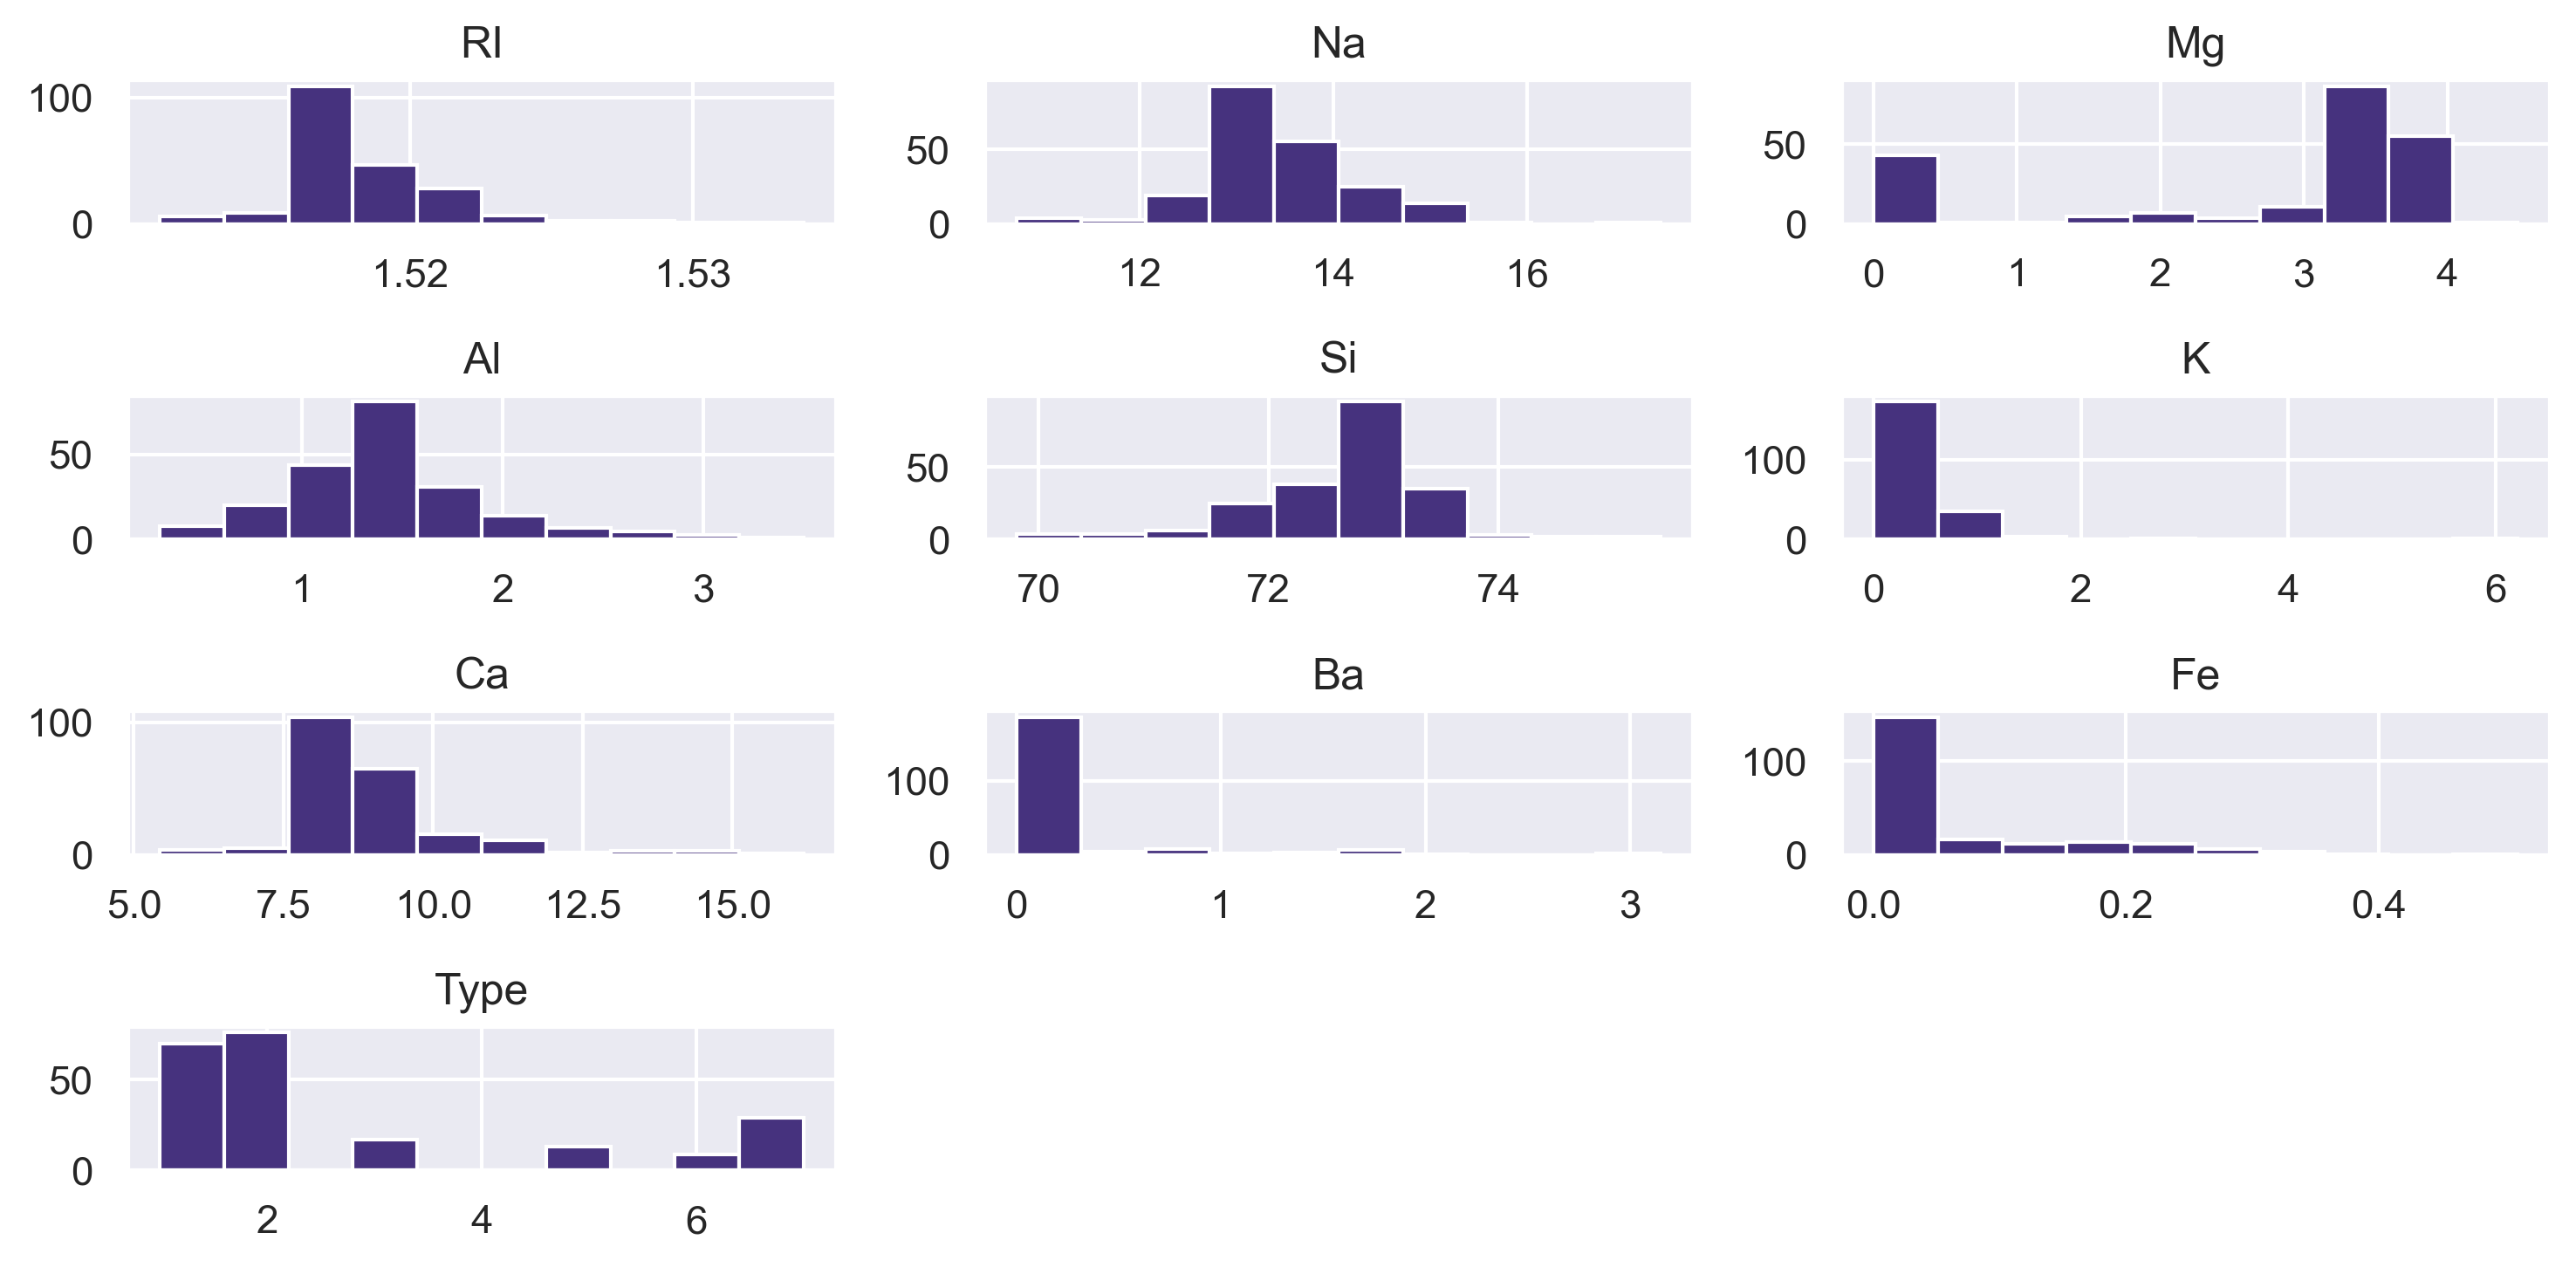

In [5]:
df.hist()
plt.tight_layout()

<AxesSubplot:xlabel='RI', ylabel='Na'>

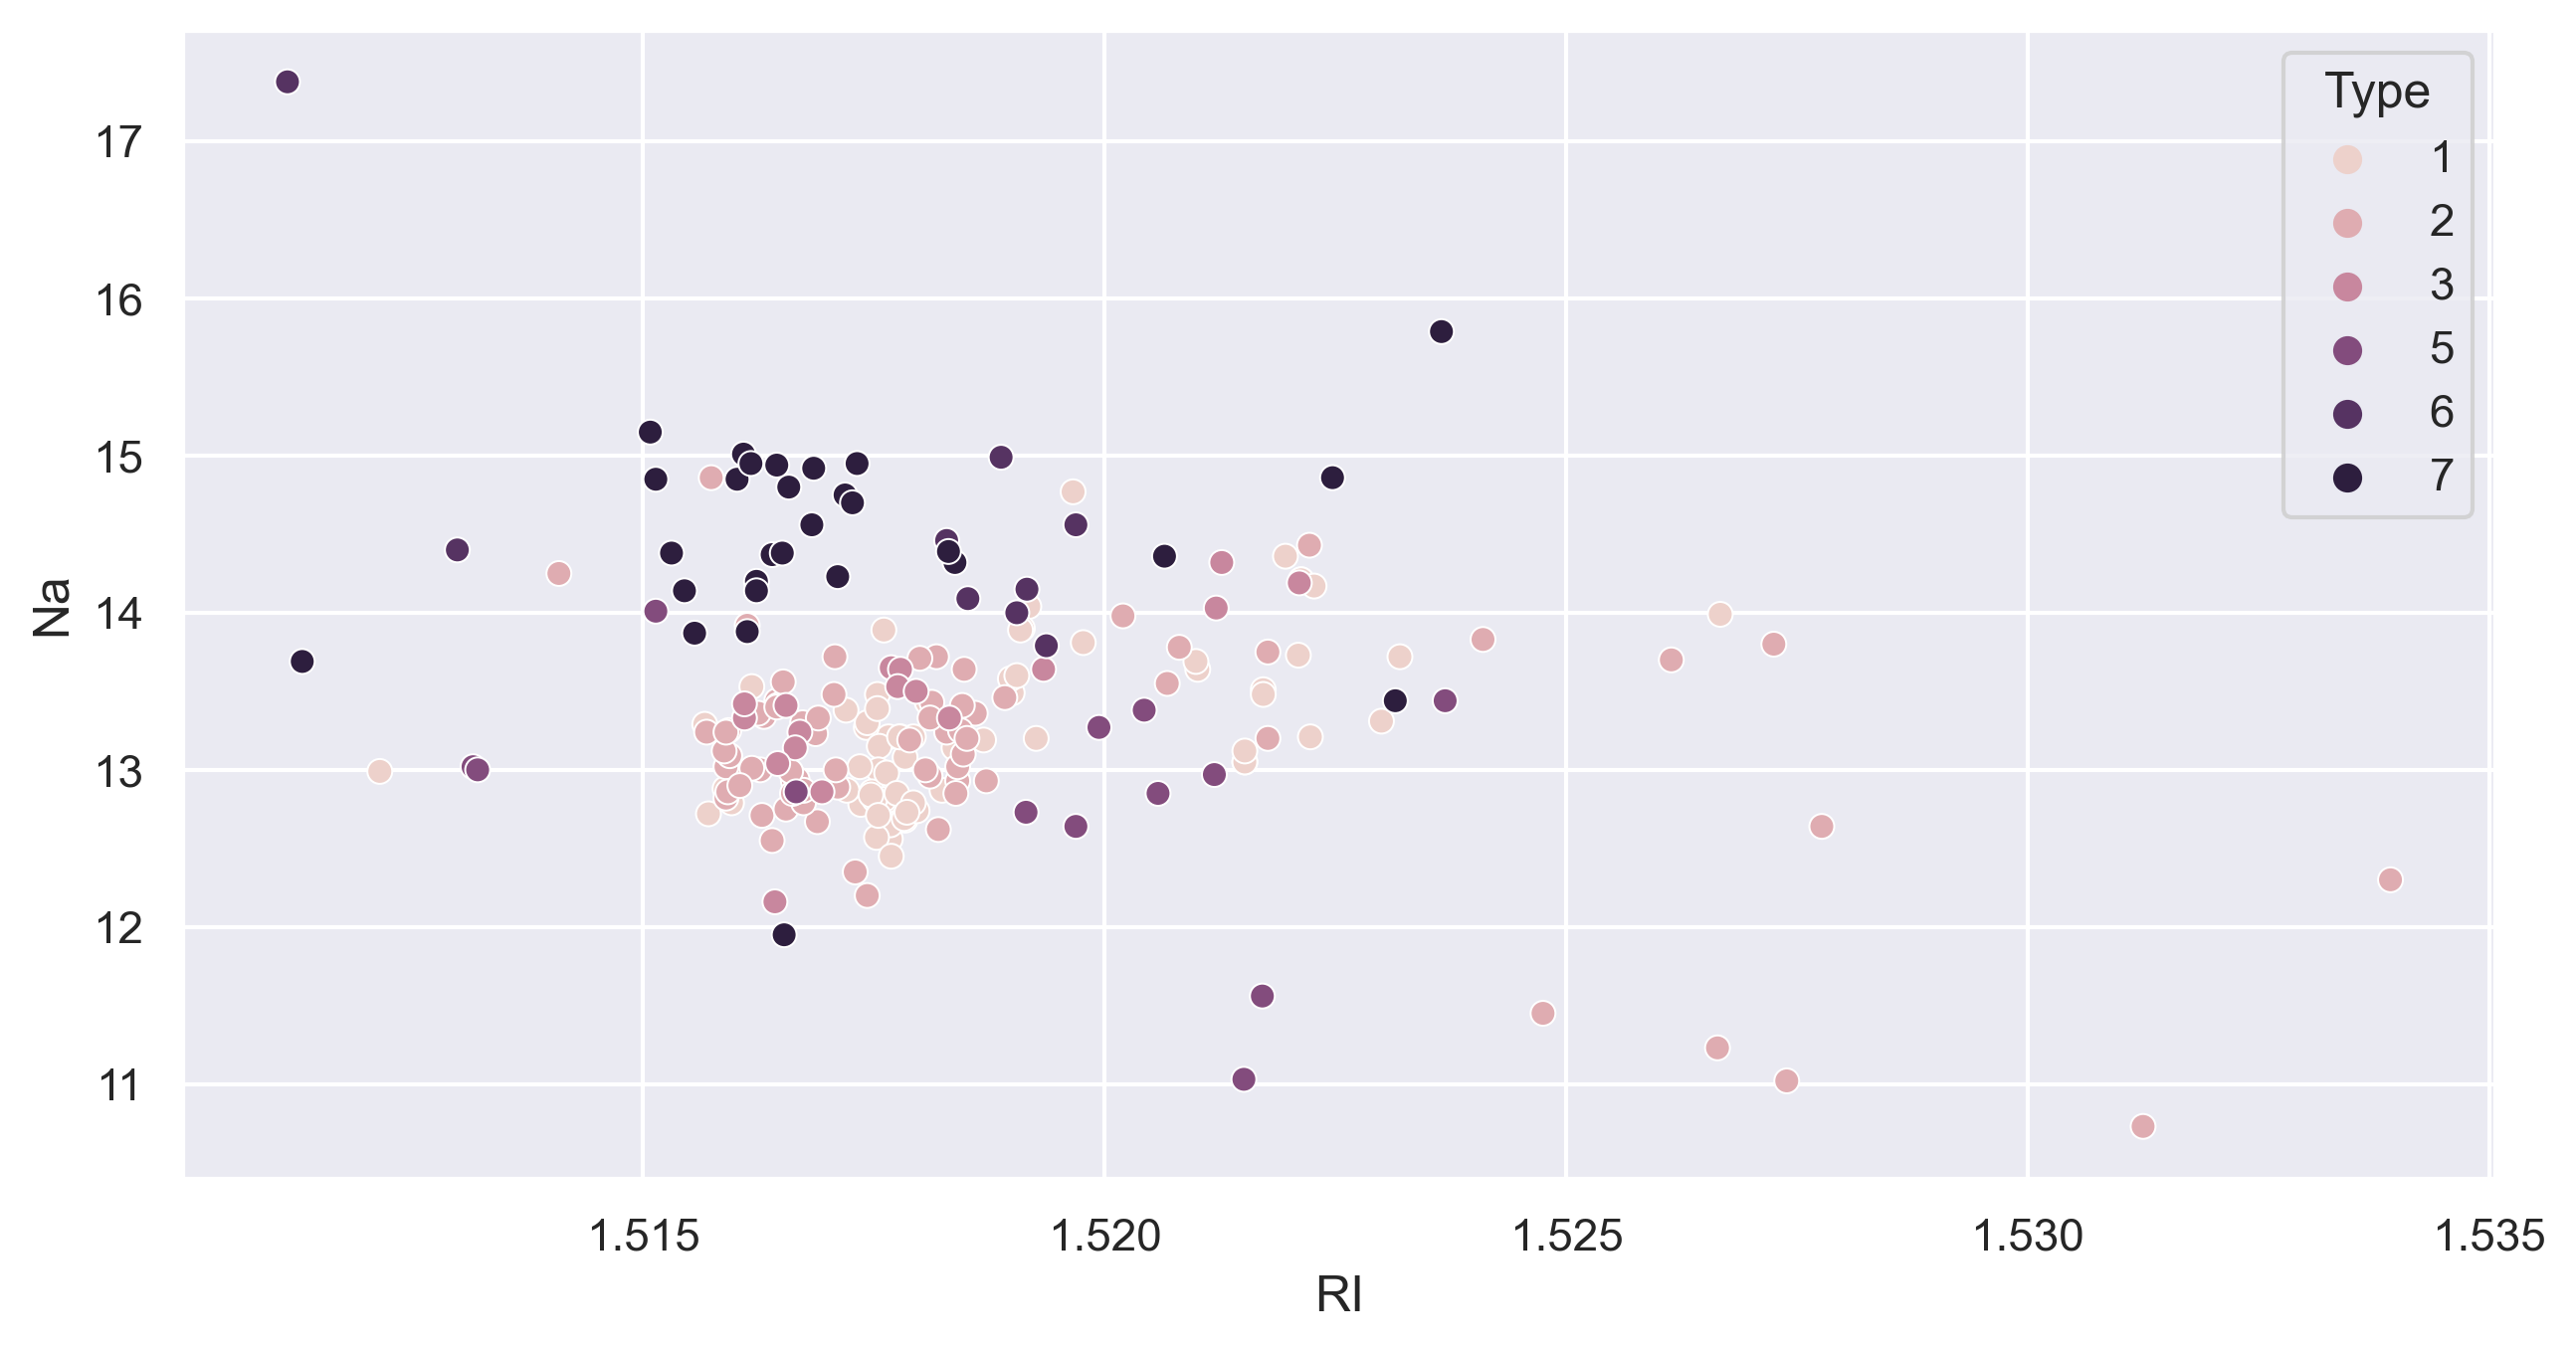

In [12]:
sns.scatterplot(data=df,x='RI',y='Na',hue='Type')

<AxesSubplot:xlabel='RI', ylabel='Al'>

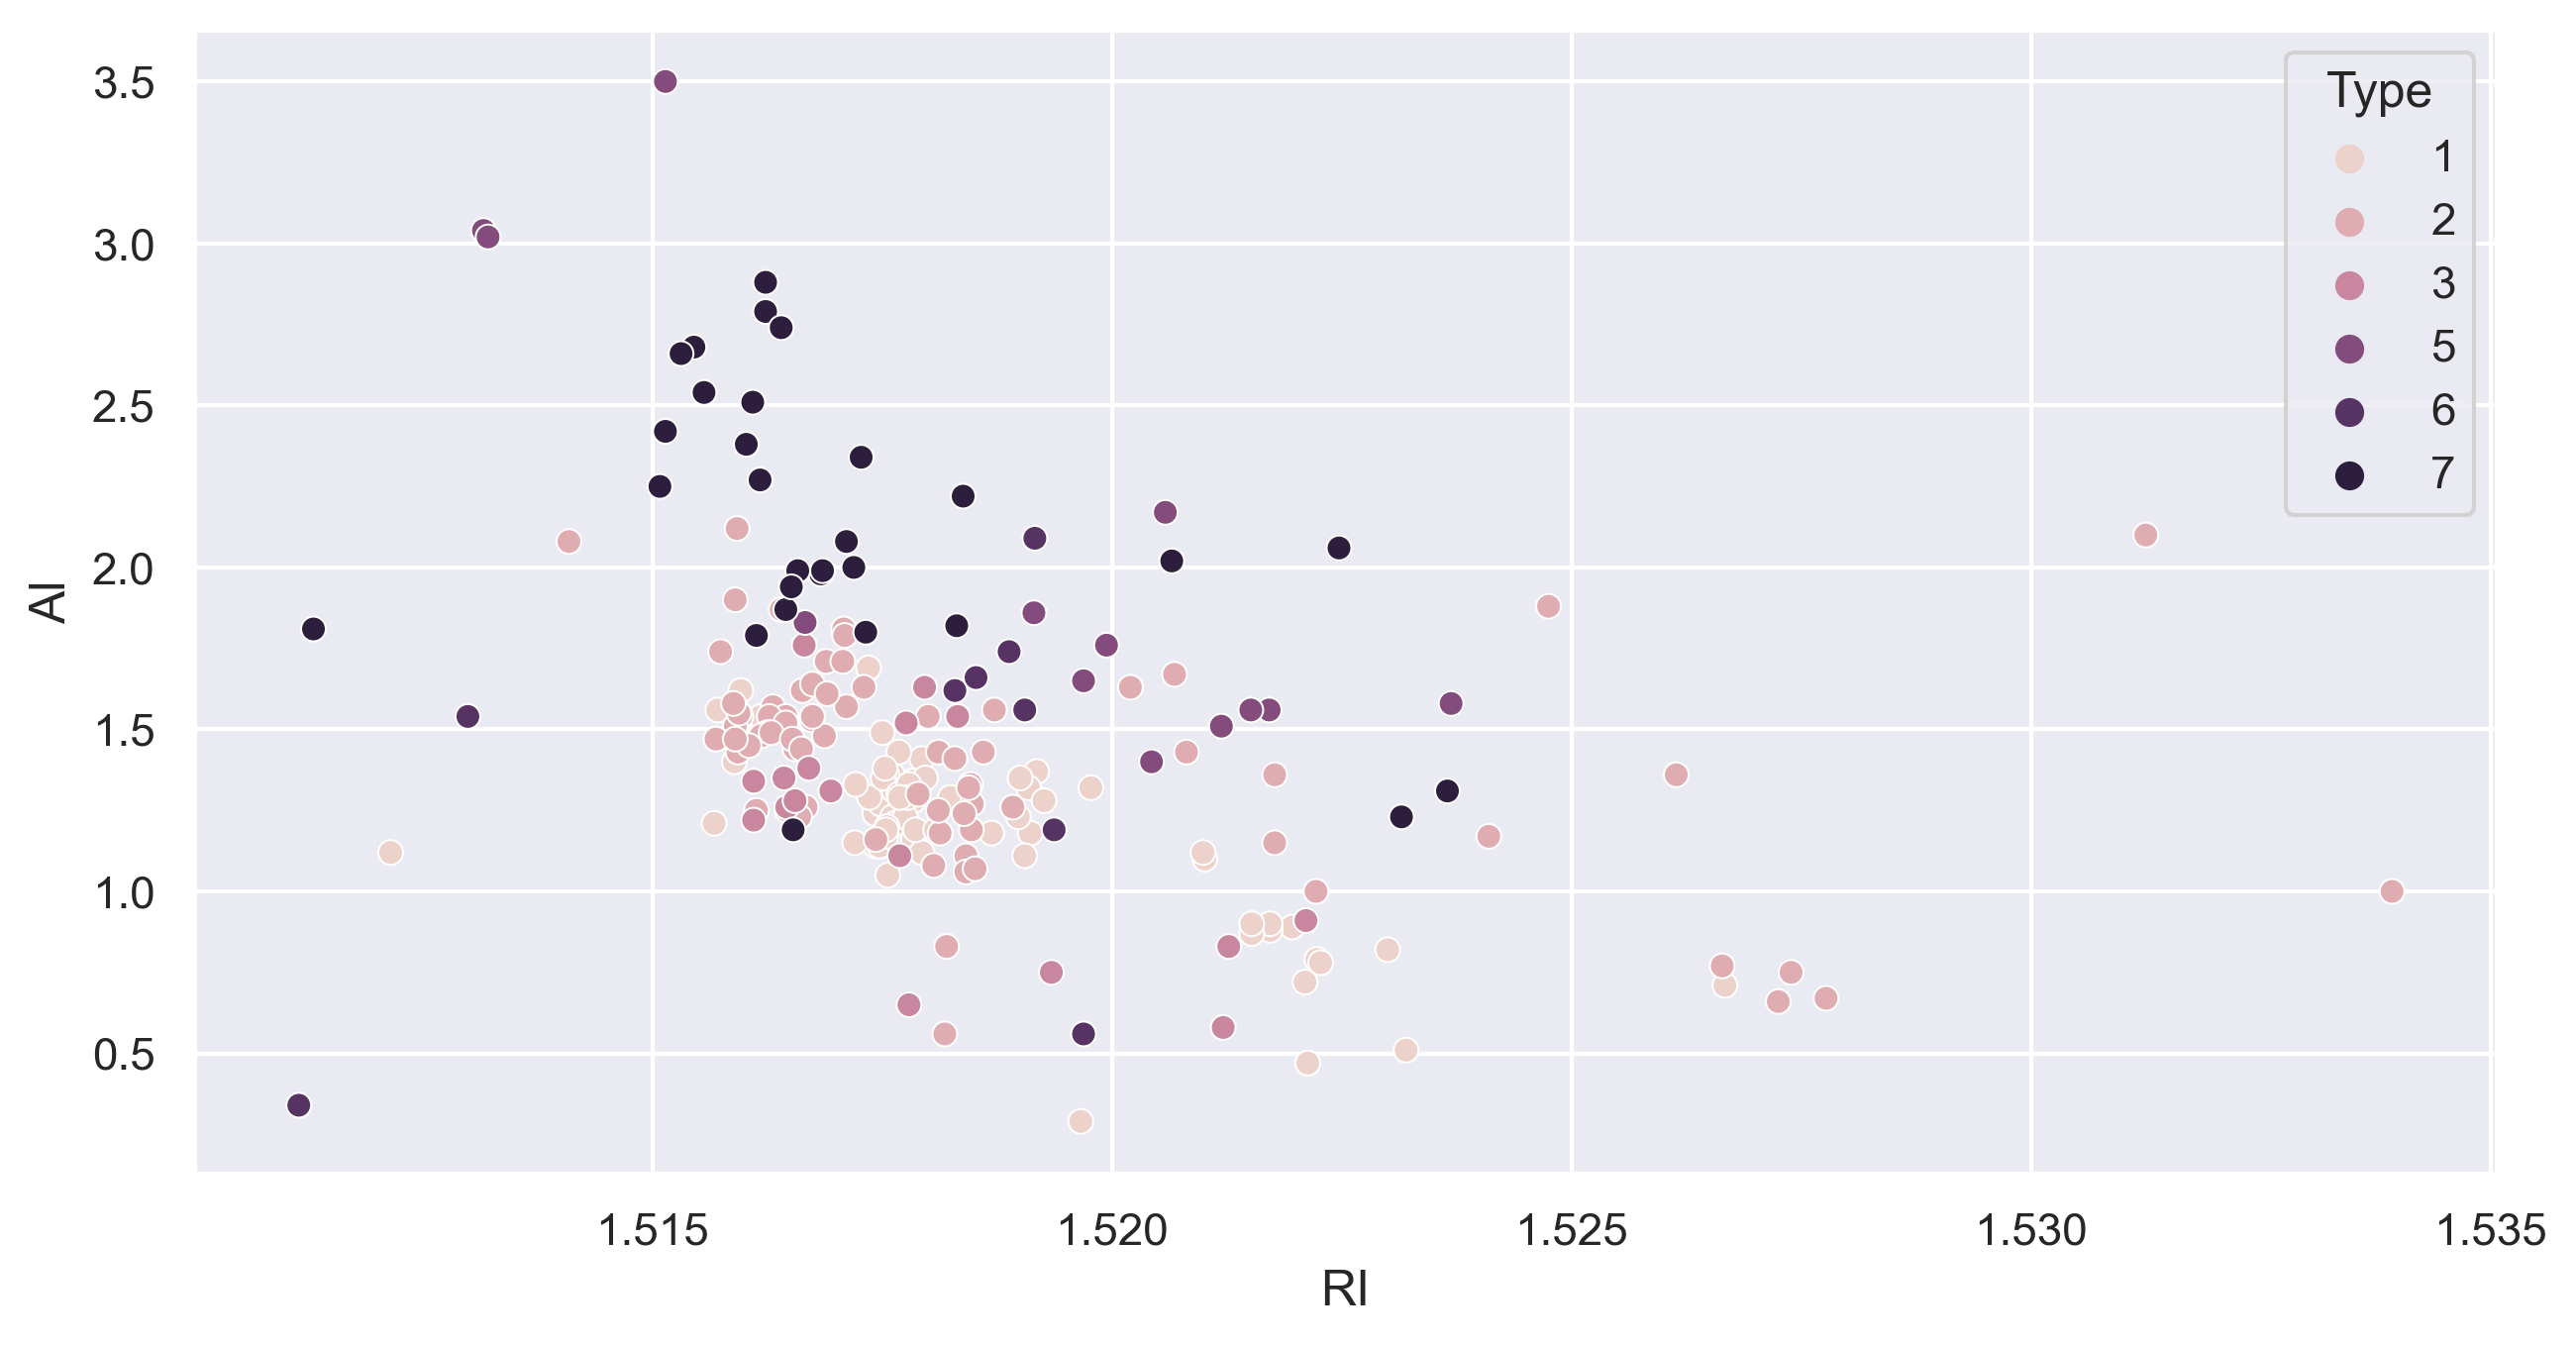

In [11]:
sns.scatterplot(data=df,x='RI',y='Al',hue='Type')

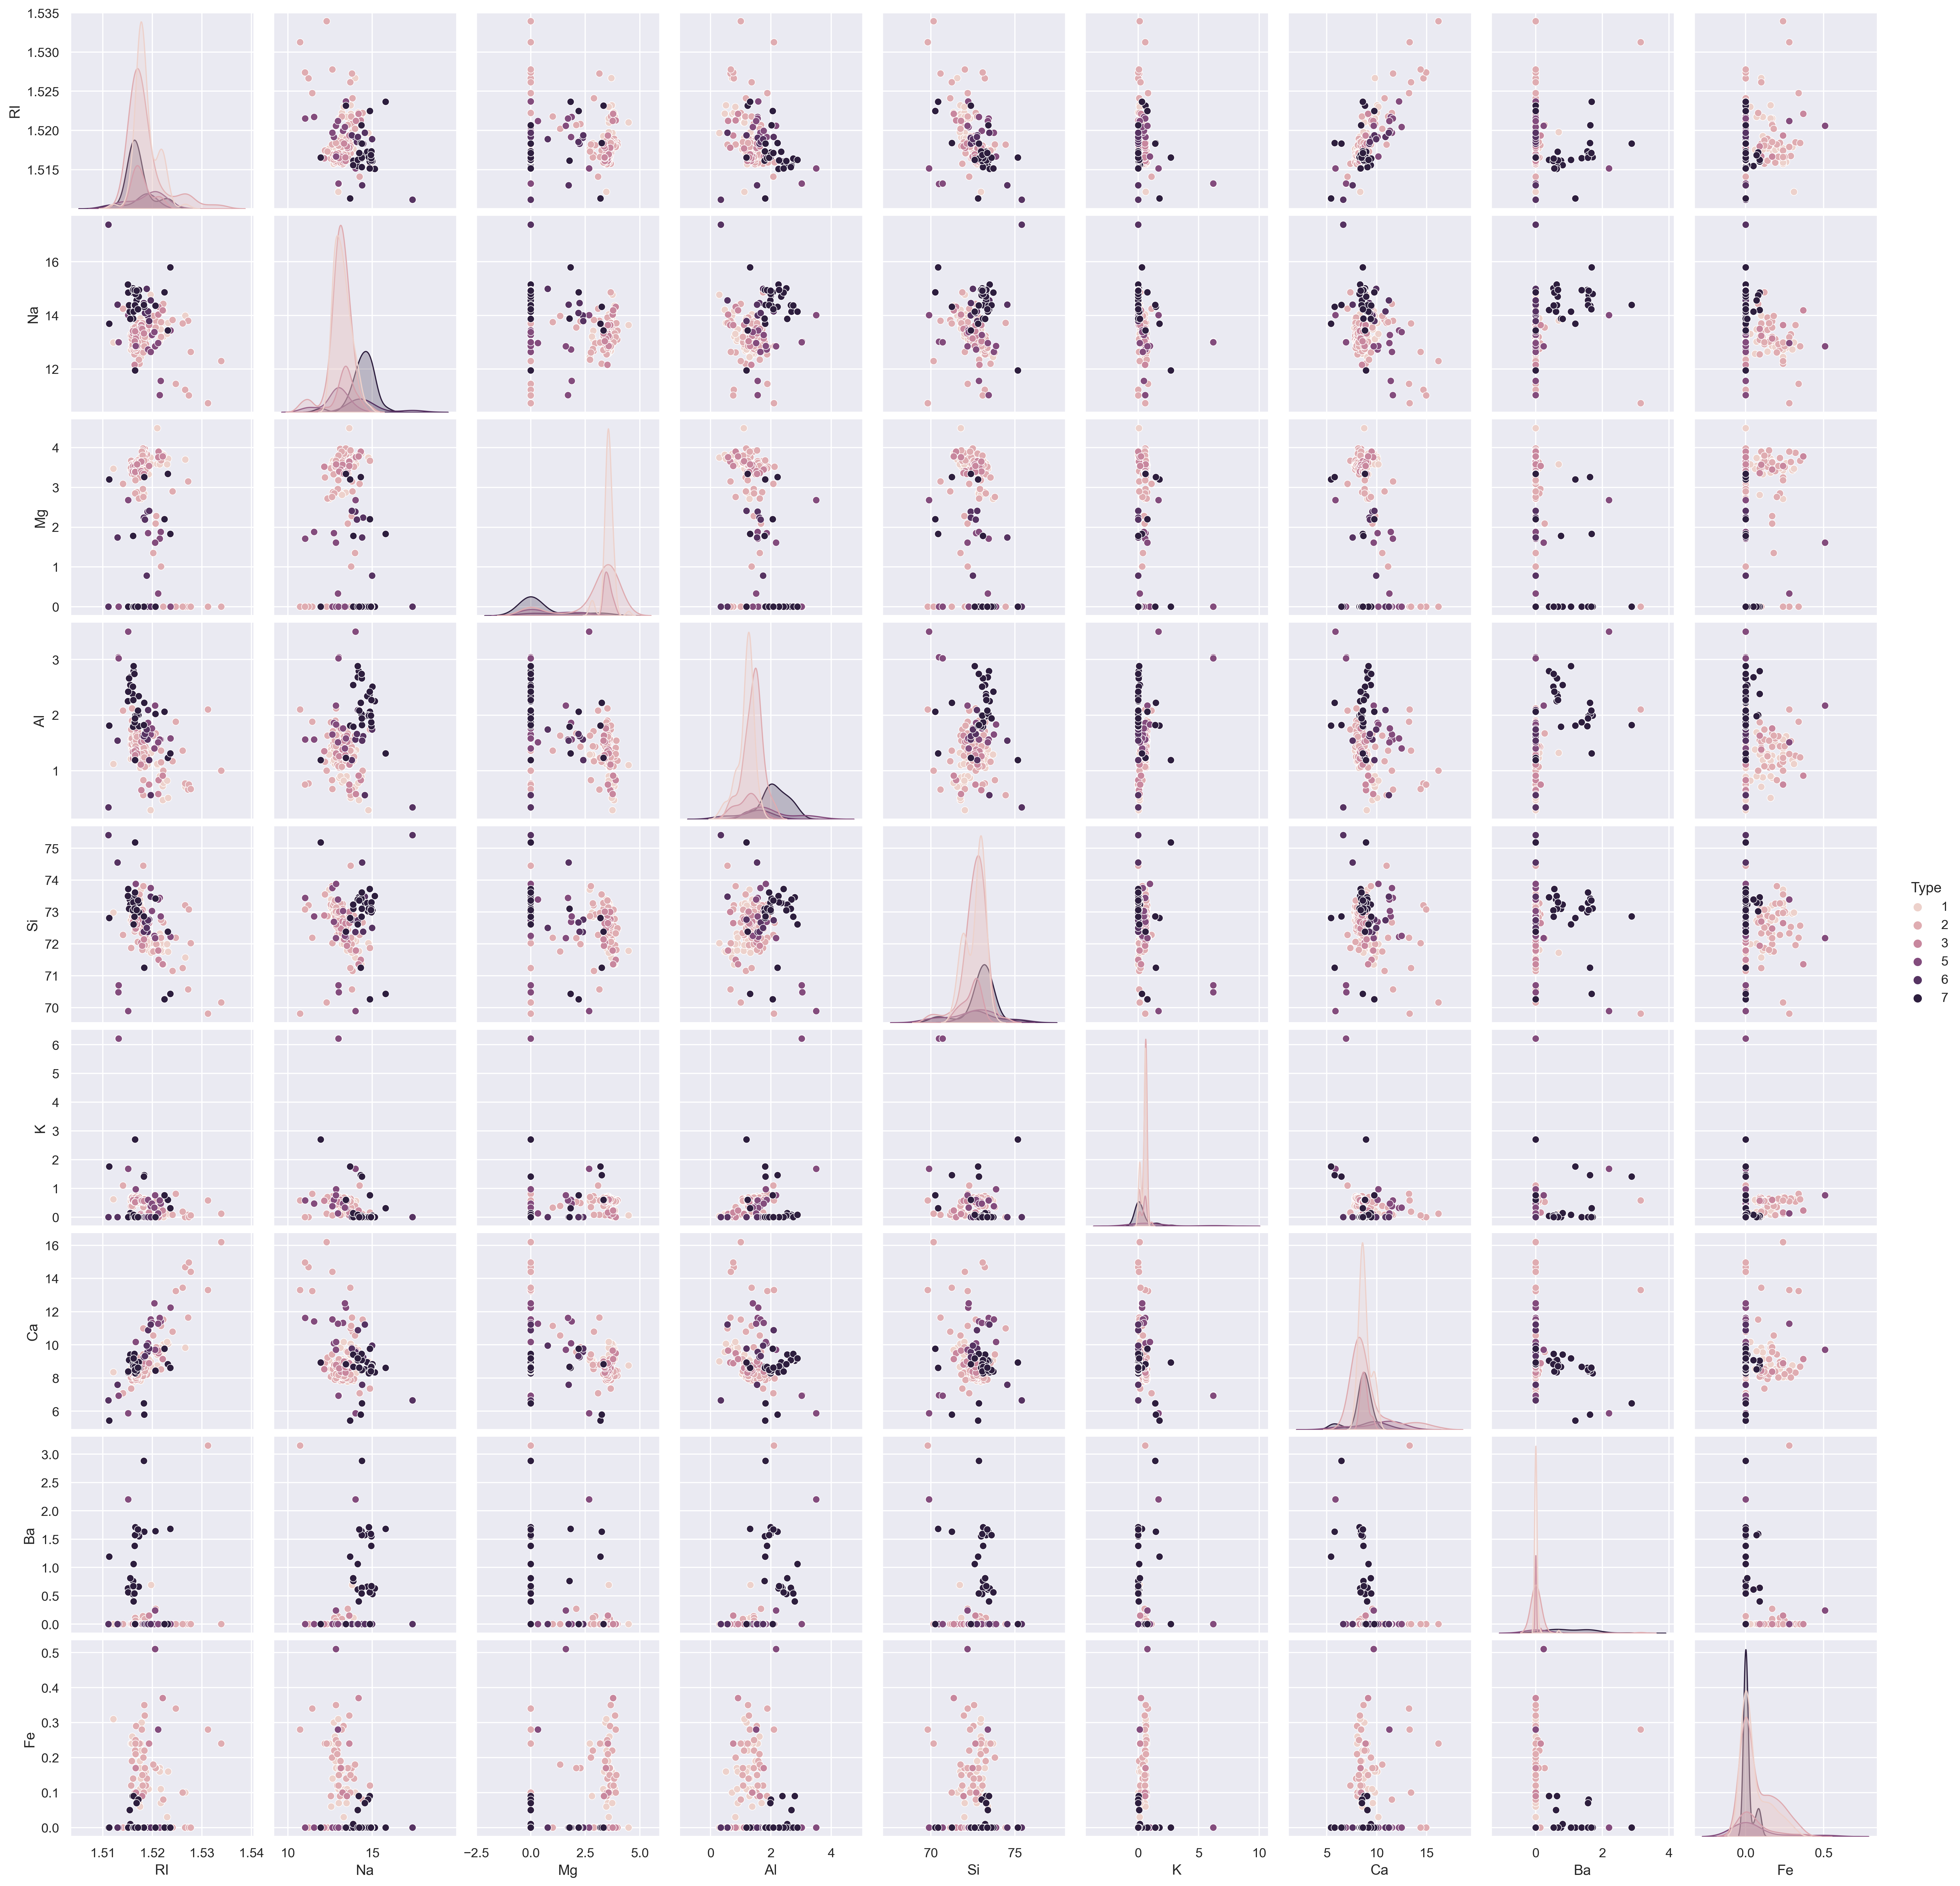

In [13]:
sns.pairplot(df,hue='Type')

#  Model Building

In [14]:
x = df.iloc[:,:-1]
y=df['Type']

In [15]:
sc=StandardScaler()
scaled = sc.fit_transform(x)
scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# Model

In [18]:
knn = KNeighborsClassifier().fit(xtrain,ytrain)


In [20]:
print('Train Report')
print(classification_report(ytrain,knn.predict(xtrain)))

Train Report
              precision    recall  f1-score   support

           1       0.65      0.93      0.77        59
           2       0.77      0.71      0.74        62
           3       0.67      0.14      0.24        14
           5       1.00      0.44      0.62         9
           6       0.67      0.67      0.67         6
           7       0.88      0.71      0.79        21

    accuracy                           0.73       171
   macro avg       0.77      0.60      0.64       171
weighted avg       0.74      0.73      0.71       171



In [21]:
ypred = knn.predict(xtest)

In [22]:
print('Test Report')
print(classification_report(ytest,ypred))

Test Report
              precision    recall  f1-score   support

           1       0.56      0.82      0.67        11
           2       0.69      0.64      0.67        14
           3       0.50      0.33      0.40         3
           5       1.00      0.25      0.40         4
           6       0.50      0.33      0.40         3
           7       0.78      0.88      0.82         8

    accuracy                           0.65        43
   macro avg       0.67      0.54      0.56        43
weighted avg       0.68      0.65      0.63        43



In [24]:
print('Training Accuracy:', knn.score(xtrain,ytrain))
print('Testing Accuracy:', knn.score(xtest,ytest))

Training Accuracy: 0.6023391812865497
Testing Accuracy: 0.5348837209302325


# Hyperparameter Tuning

In [28]:
trainac=[]
testac=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    print(f"for Neighbor={i}")
    print(f"Training Accuracy:{knn.score(xtrain,ytrain)}")
    print(f"Test Accuracy:{knn.score(xtest,ytest)}\n")
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

for Neighbor=1
Training Accuracy:1.0
Test Accuracy:0.8372093023255814

for Neighbor=2
Training Accuracy:0.8128654970760234
Test Accuracy:0.7674418604651163

for Neighbor=3
Training Accuracy:0.8245614035087719
Test Accuracy:0.7441860465116279

for Neighbor=4
Training Accuracy:0.7719298245614035
Test Accuracy:0.6976744186046512

for Neighbor=5
Training Accuracy:0.7251461988304093
Test Accuracy:0.6511627906976745

for Neighbor=6
Training Accuracy:0.7368421052631579
Test Accuracy:0.6046511627906976

for Neighbor=7
Training Accuracy:0.7251461988304093
Test Accuracy:0.6046511627906976

for Neighbor=8
Training Accuracy:0.695906432748538
Test Accuracy:0.6511627906976745

for Neighbor=9
Training Accuracy:0.6842105263157895
Test Accuracy:0.627906976744186

for Neighbor=10
Training Accuracy:0.6842105263157895
Test Accuracy:0.627906976744186

for Neighbor=11
Training Accuracy:0.6666666666666666
Test Accuracy:0.627906976744186

for Neighbor=12
Training Accuracy:0.672514619883041
Test Accuracy:0.627

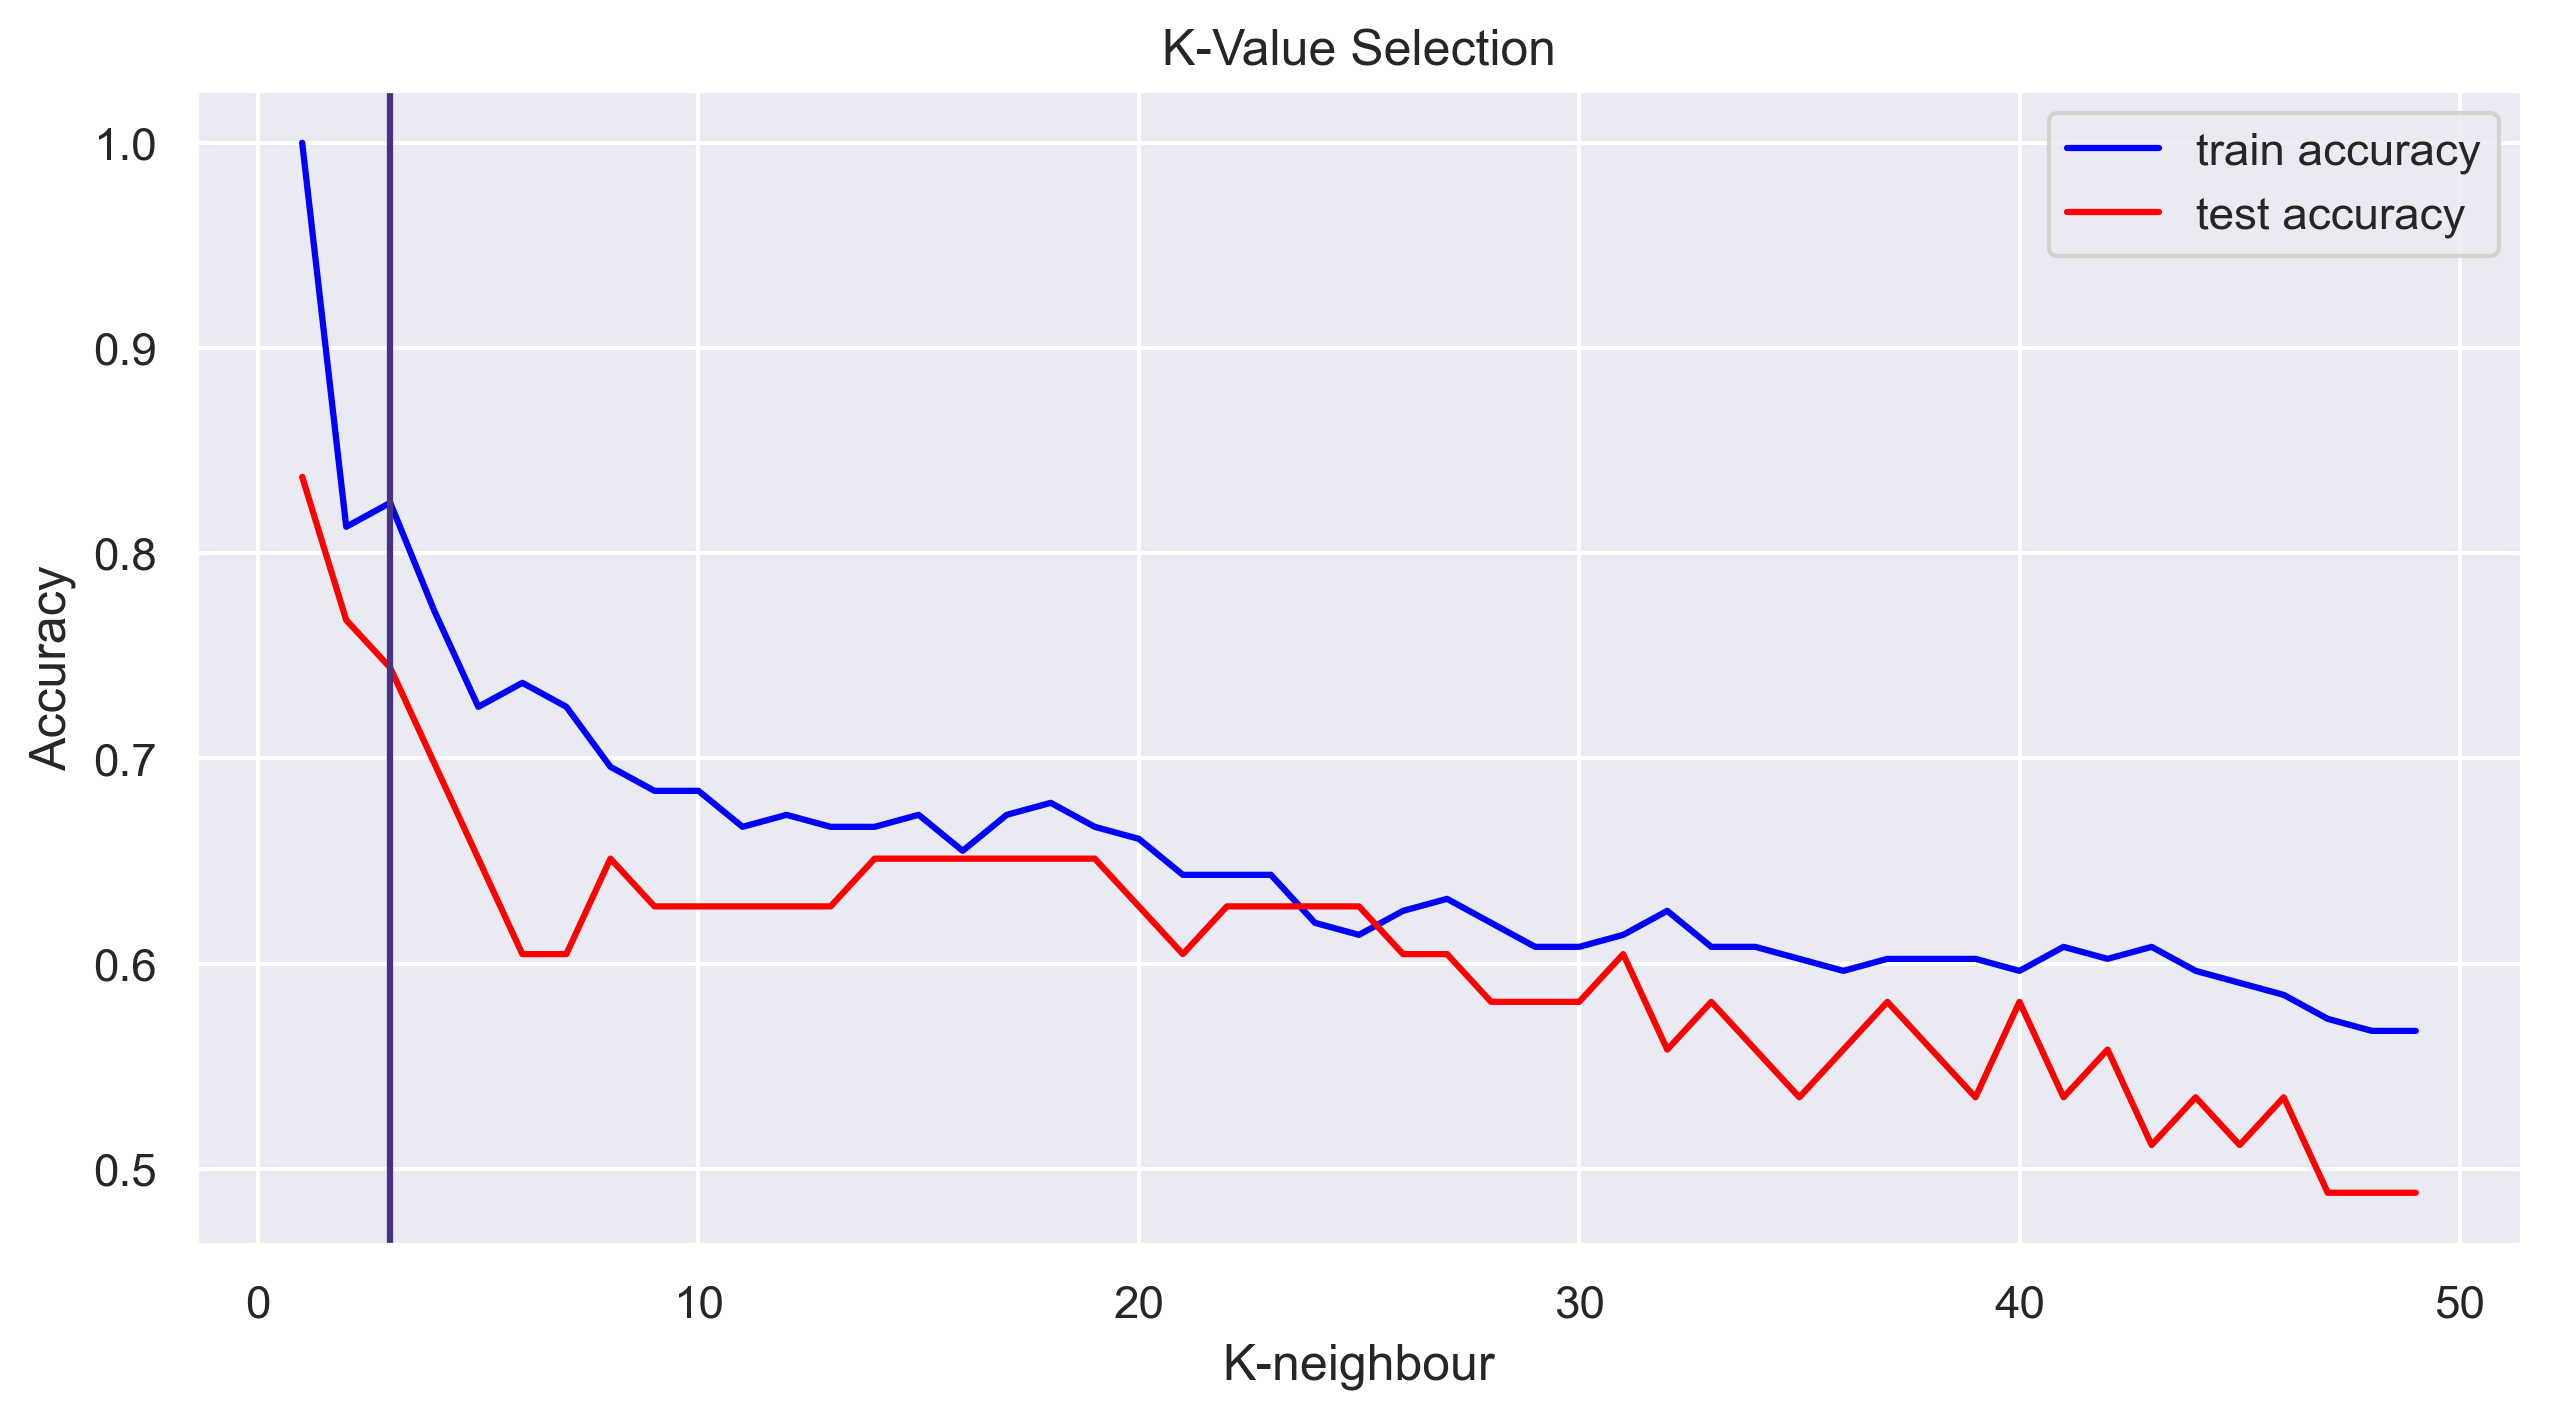

In [45]:
plt.plot(range(1,50),trainac,color='blue',label='train accuracy')
plt.plot(range(1,50),testac,color='red',label='test accuracy')
plt.xlabel('K-neighbour')
plt.ylabel('Accuracy')
plt.axvline(3)
plt.legend()
plt.title('K-Value Selection')
plt.show()

# FINAL MODEL

In [43]:
fknn = KNeighborsClassifier(n_neighbors=3).fit(xtrain,ytrain)

In [44]:
print('Train Report')
print(classification_report(ytrain,fknn.predict(xtrain)))

Train Report
              precision    recall  f1-score   support

           1       0.73      0.95      0.82        59
           2       0.88      0.79      0.83        62
           3       0.88      0.50      0.64        14
           5       1.00      0.89      0.94         9
           6       1.00      0.50      0.67         6
           7       0.95      0.86      0.90        21

    accuracy                           0.82       171
   macro avg       0.90      0.75      0.80       171
weighted avg       0.84      0.82      0.82       171



In [42]:
print(' Test Report')
print(classification_report(ytest,fknn.predict(xtest)))

 Test Report
              precision    recall  f1-score   support

           1       0.75      0.82      0.78        11
           2       0.92      0.86      0.89        14
           3       0.67      0.67      0.67         3
           5       0.80      1.00      0.89         4
           6       0.67      0.67      0.67         3
           7       1.00      0.88      0.93         8

    accuracy                           0.84        43
   macro avg       0.80      0.81      0.80        43
weighted avg       0.85      0.84      0.84        43



In [46]:
print('Training accuracy: ', fknn.score(xtrain,ytrain))
print('Testing Accuracy: ', fknn.score(xtest,ytest))

Training accuracy:  0.8245614035087719
Testing Accuracy:  0.7441860465116279


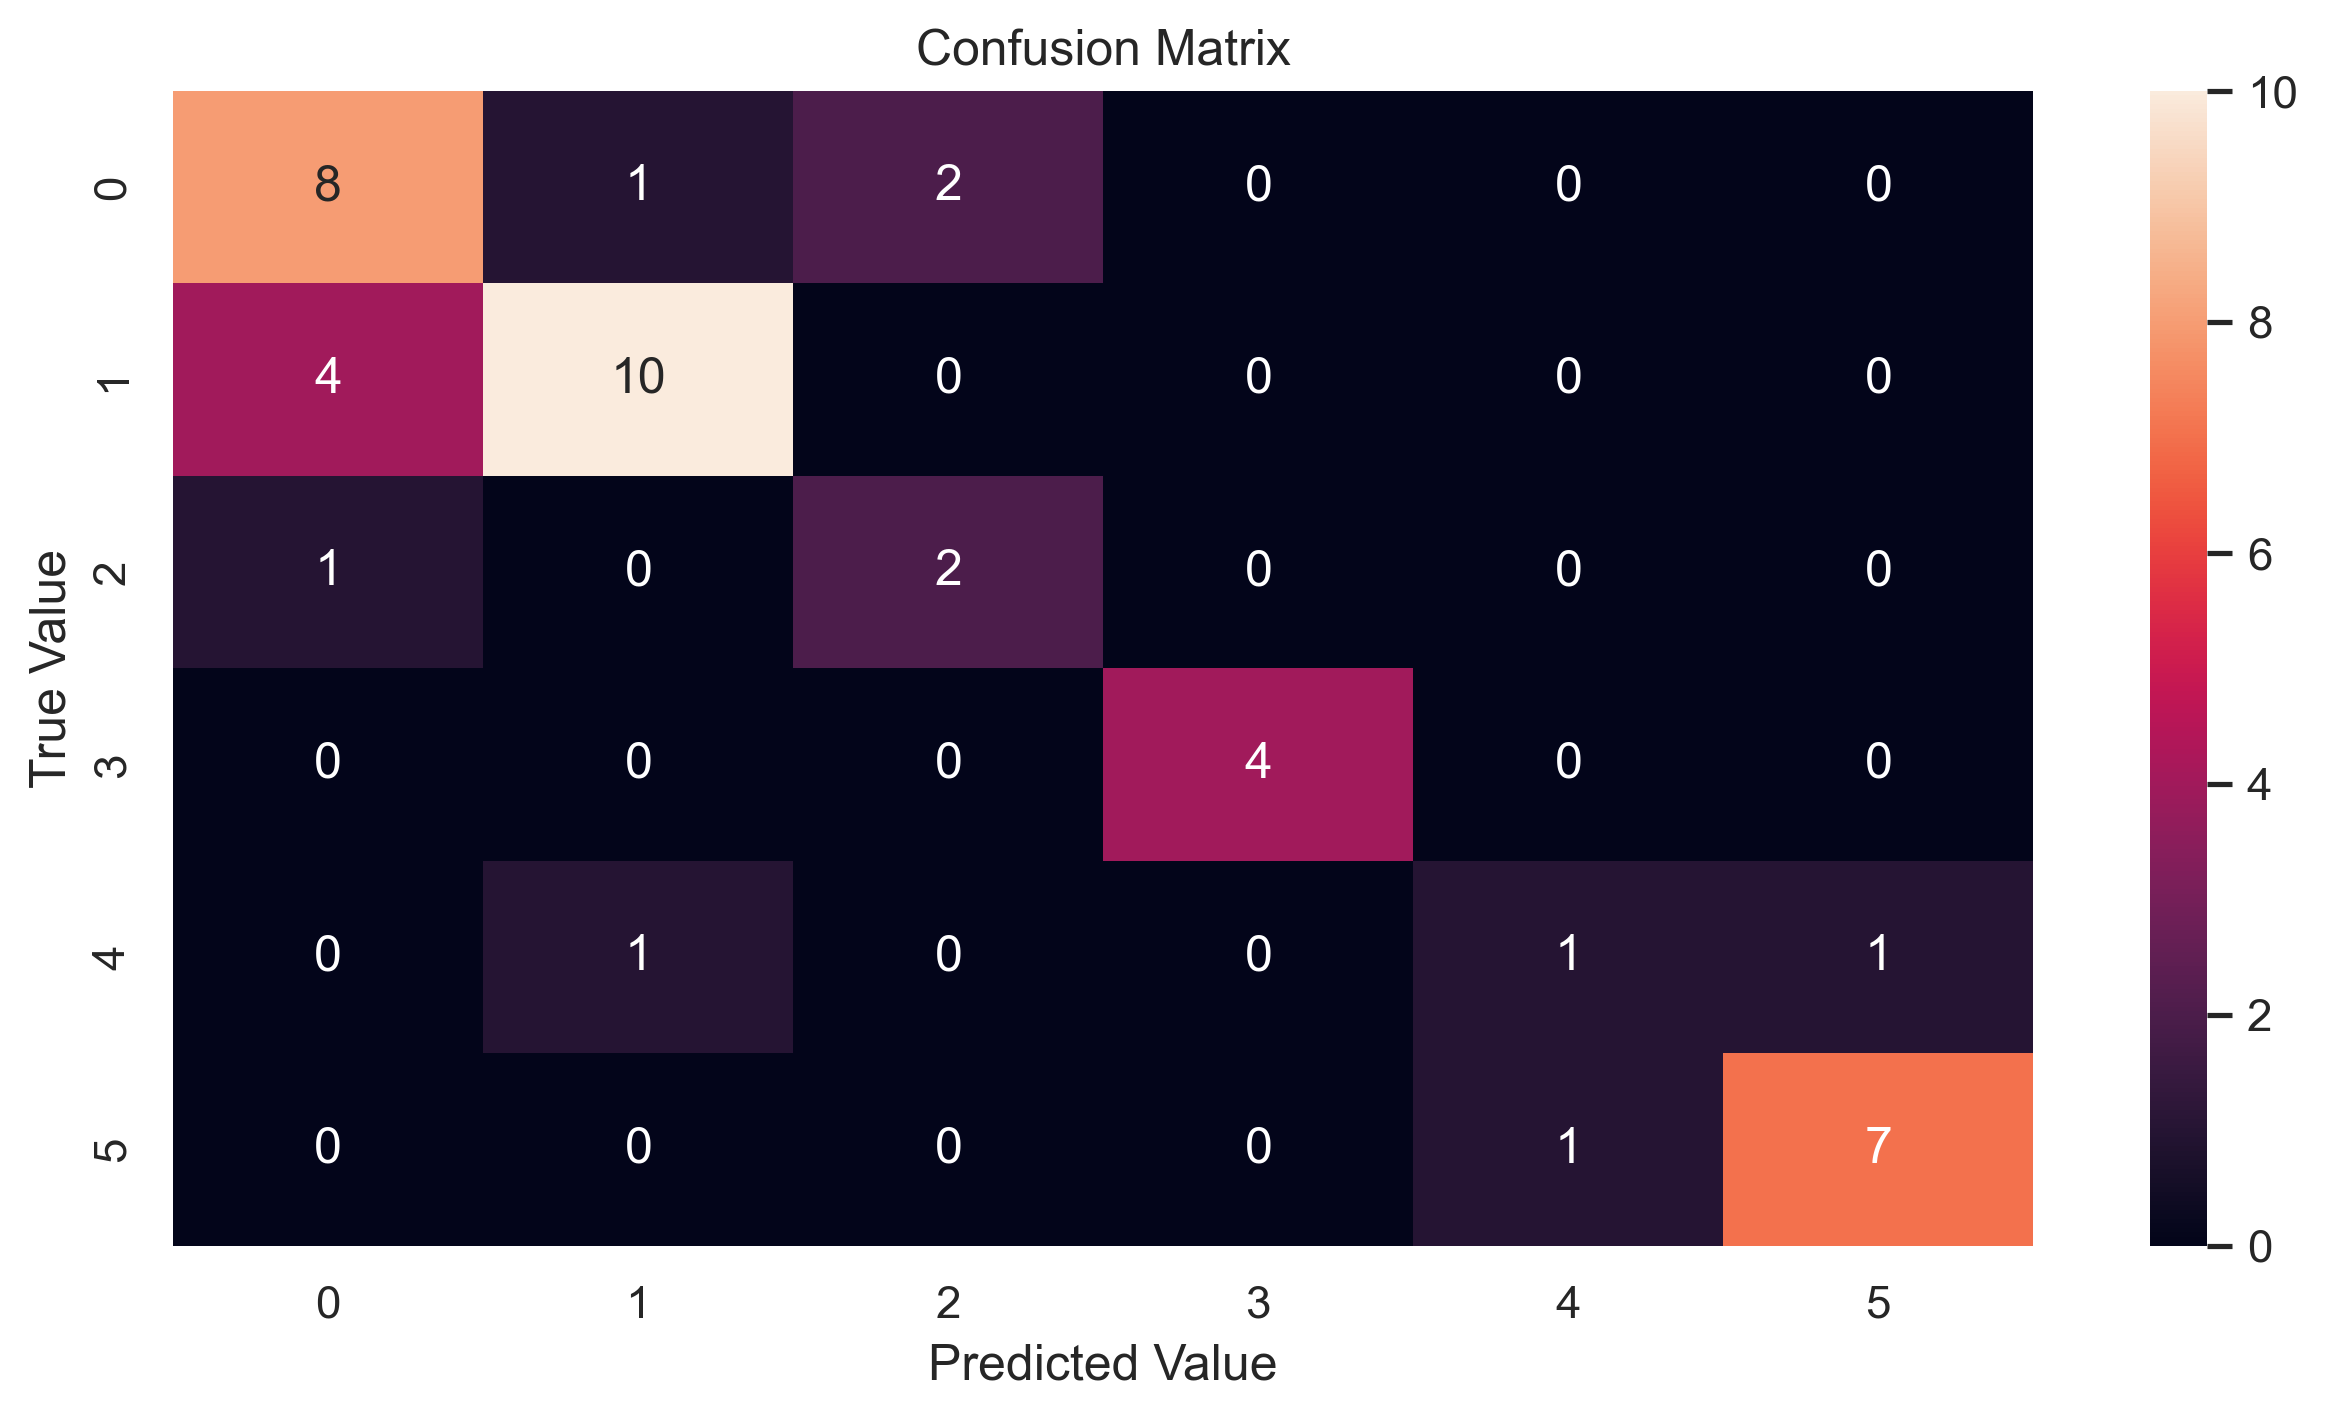

In [47]:
sns.heatmap(confusion_matrix(ytest,fknn.predict(xtest)),annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()